In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

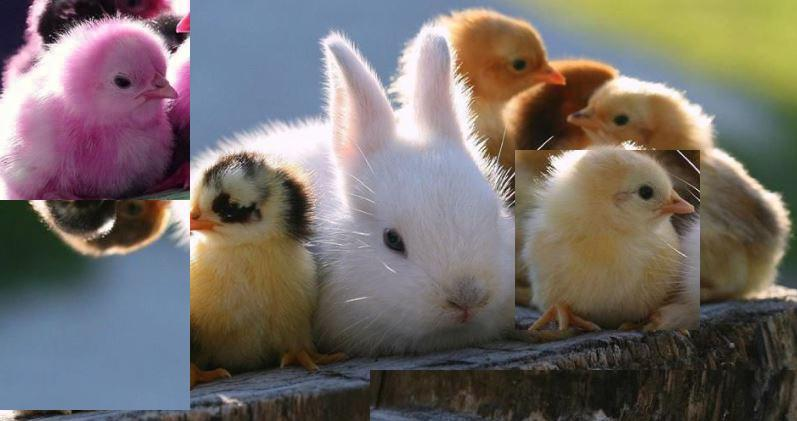

In [ ]:
img = cv.imread(r"/jigsaw.jpg")
cv2_imshow(img)

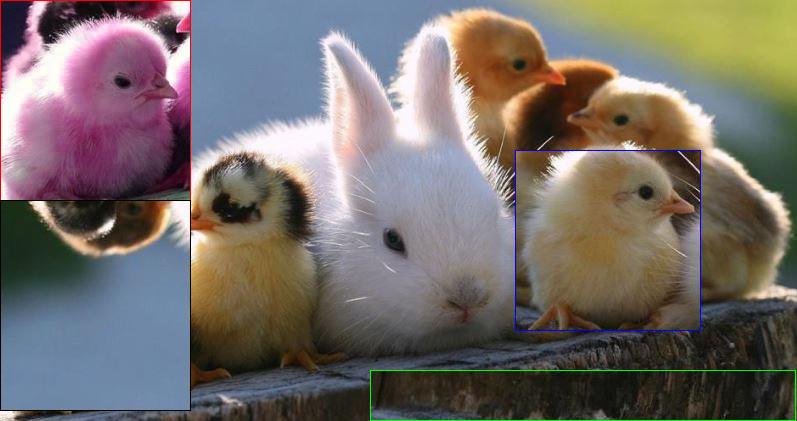

In [ ]:
# by making rectangles and shifting them little by little I found the coordinates of the misaligned boxes
#we can also use matplotlib to show image and just see the coordinates of the corners of the box by placing the pointer at that place
new=img.copy()
cv.rectangle(new,(515,150),(700,330),(255,0,0),thickness=1)
cv.rectangle(new,(370,370),(795,420),(0,255,0),thickness=1)
cv.rectangle(new,(0,0),(190,200),(0,0,255),thickness=1)
cv.rectangle(new,(0,200),(190,410),(0,0,0),thickness=1)
cv2_imshow(new)

HANDLING BLUE BOX:

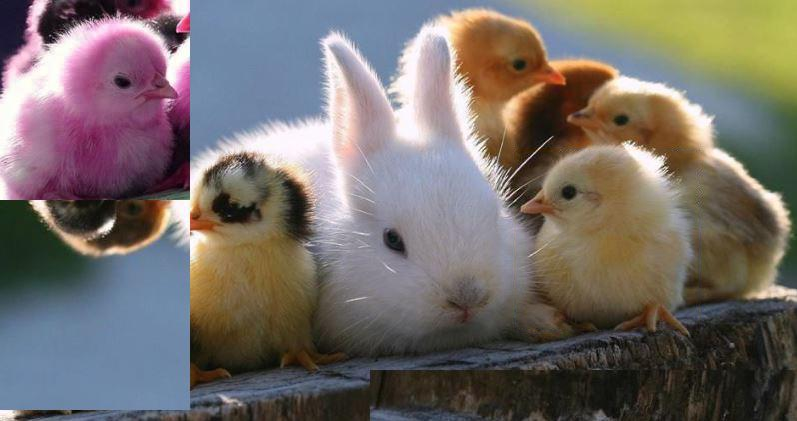

In [ ]:
#Now we make subimages, do required operations on them and then paste them in the original image:
sub_img1 = img[150:330, 515:700]
#this box is horizontally flipped, so I flipped it again and pasted it
sub_img1 = cv.flip(sub_img1, 1)
img[150:330, 515:700] = sub_img1
cv2_imshow(img)

HANDLING GREEN BOX:

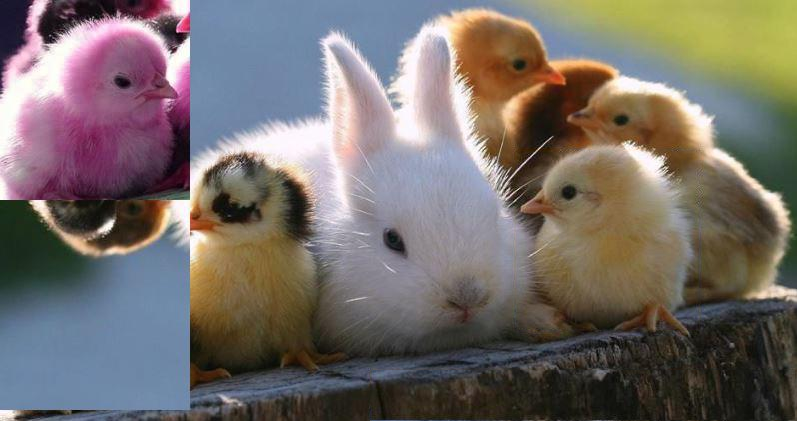

In [ ]:
#this box is vertically flipped
sub_img2 = img[370:420, 370:795]
sub_img2 = cv.flip(sub_img2, 0)
img[370:420, 370:795] = sub_img2
cv2_imshow(img)

RED BOX:

In [ ]:
#this part is shifted upwards and its rgb channels are rearranged:
sub_img3 = img[0:200, 0:190]
b, g, r = cv.split(sub_img3)
sub_img3 = cv.merge([g, b, r])

BLACK BOX:

In [ ]:
# this part is shifted downwards and vertically flipped
sub_img4 = img[200:410, 0:190]
sub_img4 = cv.flip(sub_img4, 0)

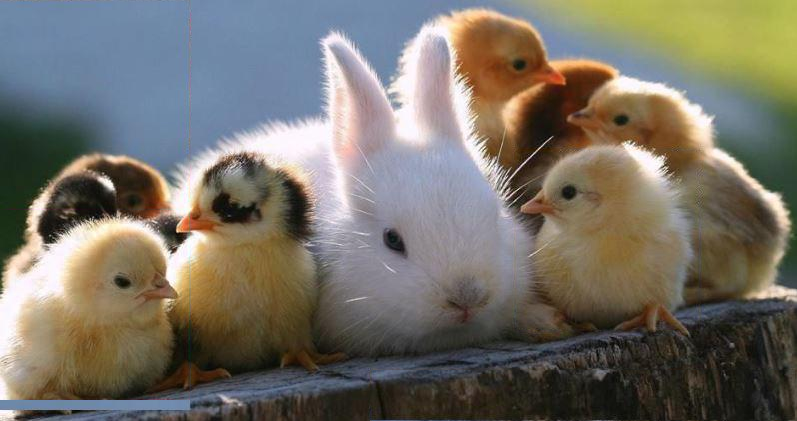

In [ ]:
#now we paste sub_img3 and sub_img4
img[200:400, 0:190] = sub_img3
img[0:210, 0:190] = sub_img4
cv2_imshow(img)